# Изучение закономерностей, определяющих успешность игр

### Описание проекта
У нас есть база данных за несколько лет с информацией по продажам компьютерных игр на различных платформах, а также такие данные, как оценки пользователей и экспертов, жанры, возрастной рейтинг, продажи в различных регионах.</b></font><br>
Нужно понять, как спланировать рекламную кампанию на 2017 год, опираясь на эти данные. Их нужно изучить и обработать, найдя среди всех данные наиболее релевантные для того, чтобы сделать на их основе прогноз. </b></font><br>

Примерный план: 
1. Изучение информации и подготовка данных к дальнейшей работе с ними
2. Проведение исследовательского анализа очищенных данных 
3. Выдвижение и проверка гипотез 
4. Выводы по проделанной работе

## Общая информация

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')
display(data.head(20))
data.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
data.duplicated().sum()

0

Явных дубликатов в данных не обнаружено

## Подготовка данных ##

Заменим названия столбцов (приведем к нижнему регистру)

In [4]:
data = data.rename(
columns={'Name': 'name', 
       'Platform': 'platform', 
       'Year_of_Release': 'year_of_release', 
       'Genre': 'genre', 
       'NA_sales': 'na_sales', 
       'EU_sales': 'eu_sales', 
       'JP_sales': 'jp_sales', 
       'Other_sales': 'other_sales', 
       'Critic_Score': 'critic_score', 
       'User_Score': 'user_score', 
       'Rating': 'rating'}
)

Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему

Посмотрим, сколько пропусков в столбце year_of_release, чтобы принять решение о том, что делать с типом данных дальше

In [5]:
data['year_of_release'].isna().sum()

269

Всего 269 пропусков из 16446 значений. Удаляем строки, в которых пропущен год выпуска игры. Далее приведем тип данных в столбце year_of_release к int

In [6]:
data = data.dropna(subset=['year_of_release'])
data['year_of_release'] = data['year_of_release'].astype('int')

Посмотрим, сколько пропусков в столбце critic_score, чтобы принять решение о том, что делать с типом данных дальше

In [7]:
data['critic_score'].isna().sum()

8463

Здесь пропущено слишком много данных, чтобы их удалить, но и если заполнить пустые строки 0 или медианой, это может сказаться на конечных результатах. Поэтому оставим пропуски NAN. 

Посмотрим, сколько пропусков в столбце user_score, чтобы принять решение о том, что делать с типом данных дальше

In [8]:
data['user_score'].isna().sum()

6607

Здесь пропущено слишком много данных, чтобы их удалить, но и если заполнить пустые строки 0 или медианой, это может сказаться на конечных результатах. Поэтому оставим пропуски NAN. 

Посмотрим также, сколько значений tbd есть в данном столбце

In [9]:
data.loc[data['user_score'] == 'tbd', 'user_score'].value_counts()

tbd    2376
Name: user_score, dtype: int64

Значений tbd слишком много, чтобы на них не обращать внимание. Эта аббревиатура расшифровывается, как To Be Determined, то есть "Будет определено", то есть по сути оценки еще нет. Можно заменить эту аббревиатуру на NAN.

In [10]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = float('NaN')
data['user_score'] = data['user_score'].astype('float')

Посмотрим, какие значения есть в столбце рейтинги

In [11]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Посчитаем количество пропусков в столбце с рейтингом

In [12]:
data['rating'].isna().sum()

6678

Заменяем пропуски на unknown

Рейтинг ESRB используется для определения возраста, подходящего для той или иной игры в странах Северной Америки. То есть пропуски здесь стоят для стран остальных регионов. Заполним такие строки значением "unknown".

In [13]:
data['rating'] = data['rating'].fillna('unknown')

In [14]:
data['rating'].isna().sum()

0

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [15]:
data['region_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [16]:
# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16446 non-null  object 
 11  region_sales     16446 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio: Instant Artist' '¡Shin Chan Flipa en colores!' nan]
name : кол-во

In [17]:
data = data.dropna(subset=['name'])

In [18]:
data = data.dropna(subset=['genre'])

## Исследовательский анализ данных ##

Посмотрим, сколько игр выпускалось в разные годы. Определим, важны ли данные за все периоды.

In [19]:
data['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

Text(0, 0.5, 'общие продажи')

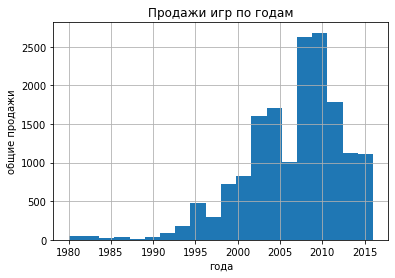

In [20]:
data['year_of_release'].hist(bins=20)
plt.title('Продажи игр по годам')
plt.xlabel('года')
plt.ylabel('общие продажи')

С начала 80-ых годов количество выпускаемых игр довольно сильно растет. Для дальнейшей оценки можно взять данные за последние 5 лет, так как более ранние периоды уже не релевантны.   

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Посмотрим, за какой характерный срок появляются новые и исчезают старые платформы.

In [21]:
pd.pivot_table(data, index=['platform'], values=['region_sales']).sort_values(by='region_sales', ascending=False)


,region_sales
platform,
GB,2.622990
NES,2.561735
GEN,1.050000
SNES,0.836987
PS4,0.801378
X360,0.780227
2600,0.745517
PS3,0.713124
Wii,0.692986


Возьмем первые 5 платформ и посмотрим продажи по годам

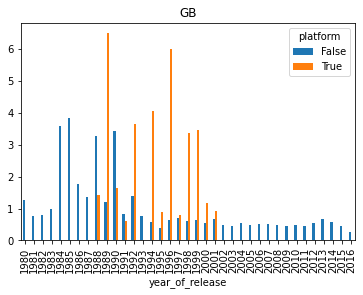

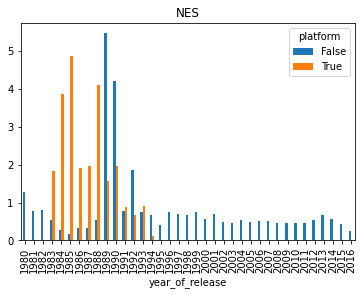

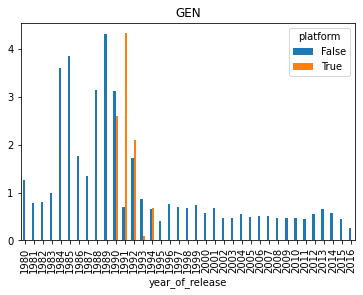

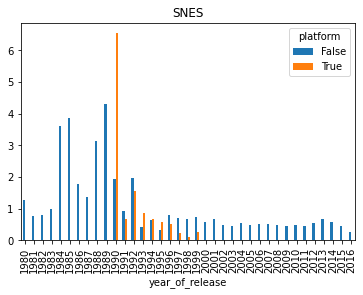

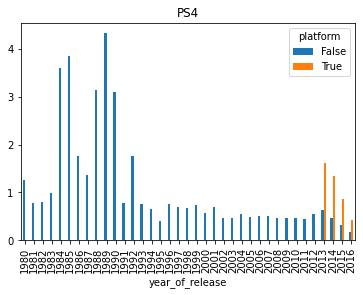

In [22]:
#data.loc[data['user_score'] == 'tbd', 'user_score']
#data_GB = data.loc[data['platform'] == "GB",'year_of_release'].sum()
#data_GB.plot(kind='bar', figsize = (20, 6))
#plt.xlabel('Года')
#plt.ylabel('Продажи')
#plt.show()

for pt in ['GB', 'NES', 'GEN', 'SNES', 'PS4']:
    data.pivot_table(columns =(data['platform'] == pt), index='year_of_release', values='region_sales')\
    .plot(kind='bar', title=pt)

In [23]:
data = data.loc[data['year_of_release'] > 2011]
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,region_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

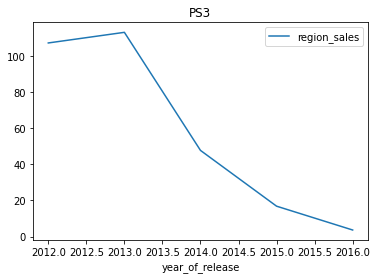

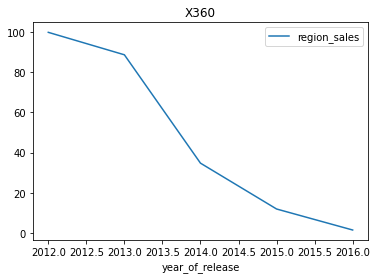

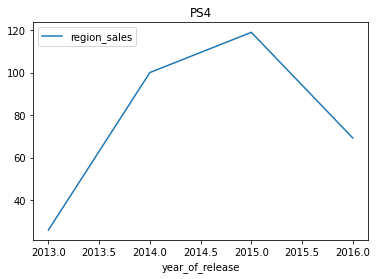

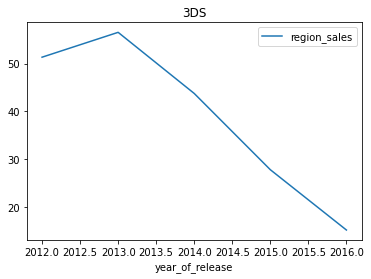

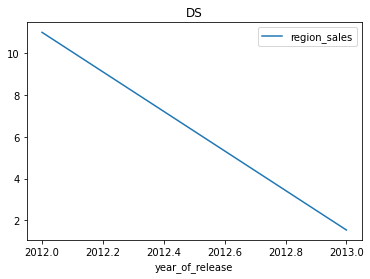

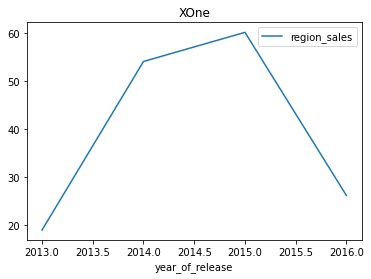

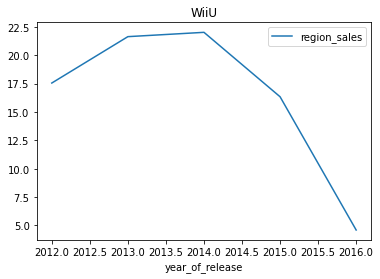

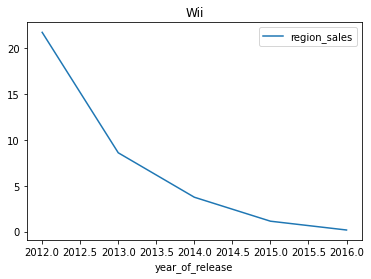

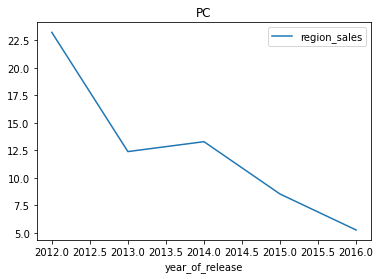

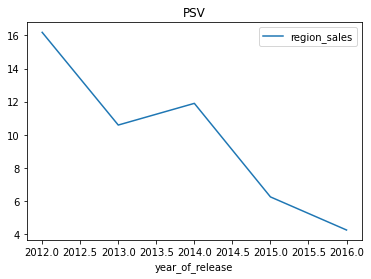

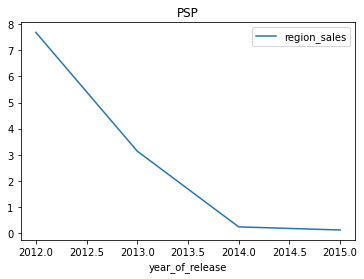

In [24]:
for pt in data['platform'].unique():
    data.loc[data['platform'] == pt].groupby('year_of_release').agg({'region_sales':'sum'}).plot(title=pt)

Многие платформы, начиная с роста в начале, позже показывают сильный спад продаж. При этом можно выделить следующие платформы с очень высокими продажми в лучшие свои годы: X360, PS3, XOne, PS4, 3DS. Остановимся на этих платформах, как на потенциально прибыльных.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по выбранным платформам.

<AxesSubplot:title={'center':'region_sales'}, xlabel='platform'>

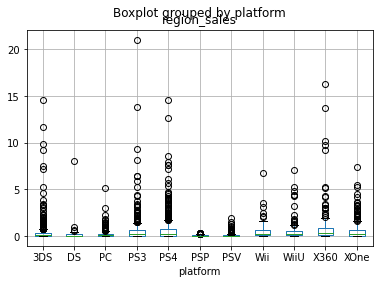

In [25]:
data.boxplot('region_sales', by='platform')

(0.0, 1.2)

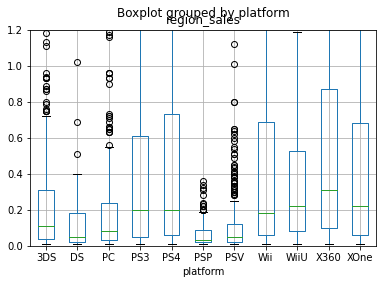

In [26]:
data.boxplot('region_sales', by='platform')
plt.ylim(0, 1.2)

Посмотрим, как влияют на продажи внутри популярных платформ отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируем выводы.

0.3314972592629587


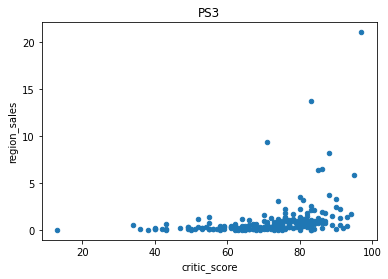

0.3605734888507336


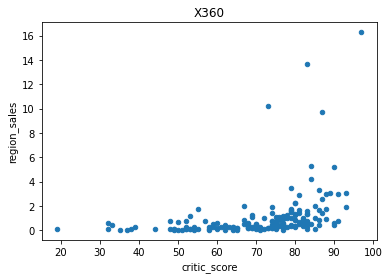

0.40656790206178095


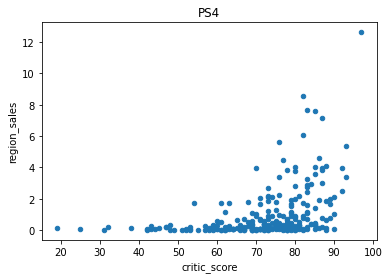

0.3208028695360785


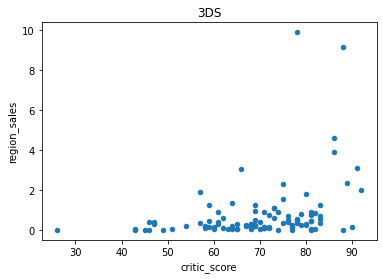

0.4169983280084017


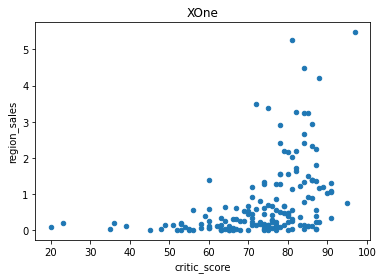

In [27]:
profit_platforms = data[data['platform'].isin(["X360", "PS3", "PS4", "XOne", "3DS"])]
profit_platforms
for pt in profit_platforms['platform'].unique():
    profit_platforms.loc[profit_platforms['platform'] == pt].plot(x='critic_score', y='region_sales', kind='scatter', title=pt)
    print(profit_platforms.loc[profit_platforms['platform'] == pt]['critic_score'].corr(profit_platforms.loc[profit_platforms['platform'] == pt]['region_sales']))
    plt.show()

Как видно из диаграмм рассеяния и коэффициентов корреляции прямая корреляция между продажи и оценками критиков есть, хотя и не очень большая. Чем выше оценка критиков, тем сильнее она влияет на рост продаж.

-0.005143522887113828


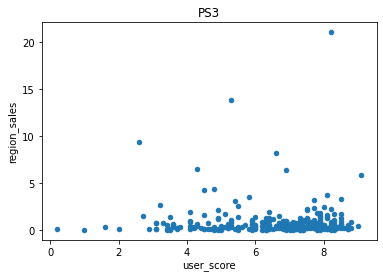

0.006163978646213326


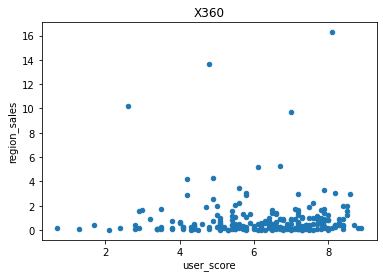

-0.031957110204556376


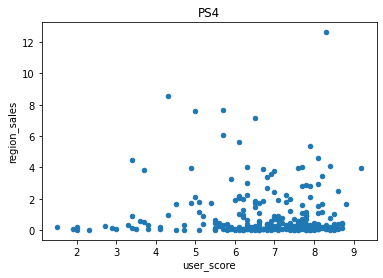

0.19758263411038599


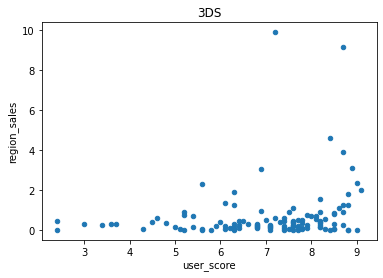

-0.06892505328279414


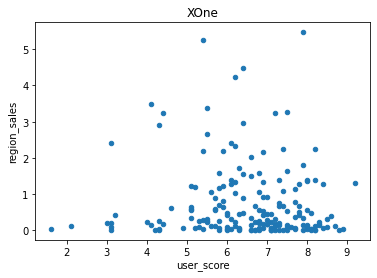

In [28]:
for pt in profit_platforms['platform'].unique():
    profit_platforms.loc[profit_platforms['platform'] == pt].plot(x='user_score', y='region_sales', kind='scatter', title=pt)
    print(profit_platforms.loc[profit_platforms['platform'] == pt]['user_score'].corr(profit_platforms.loc[profit_platforms['platform'] == pt]['region_sales']))
    plt.show()

Как видно из диаграмм рассеяния и коэффициентов корреляции прямой корреляции между продажи и оценками юзеров практически нет, а в некоторых случаях она вообще становится отрицательной, хотя и совсем чуть-чуть. 

Посмотрим на общее распределение игр по жанрам: что можно сказать о самых прибыльных жанрах? выделяются ли жанры с высокими и низкими продажами?

In [29]:
#Посмотрим на суммарные продажи регионов, а также медианные продажи
profit_platforms.pivot_table(index='genre', values='region_sales', aggfunc=['sum', 'median'])

,sum,median
,region_sales,region_sales
genre,,
Action,376.25,0.170
Adventure,22.68,0.060
Fighting,35.53,0.180
Misc,48.78,0.150
Platform,34.13,0.210
Puzzle,2.72,0.070
Racing,42.18,0.225
Role-Playing,151.26,0.200


Самые большие суммарные продажи в жанре игр Ation, самые низкие - Strategy. Хотя медианные продажи и у тех, и у других довольно небольшие по сравнению с некоторыми другими жанрами игр, такими как Shooter или Fighting.

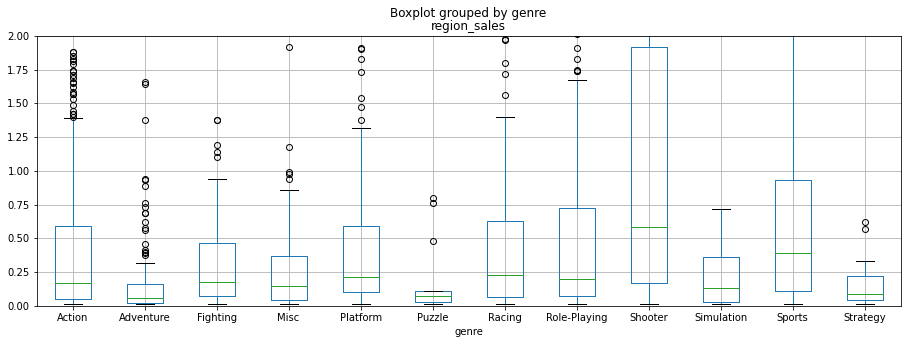

In [30]:
profit_platforms.boxplot('region_sales', by='genre', figsize=(15, 5))
plt.ylim(0,2)
plt.show()

По диаграммам размаха видно, что жанр Shooter действительно обладает самыми высокими медианными продажими и самым болшим размахом. В то время, как в продажи жанра Action судя по всему вклад делают большое количество выбросов. 

## Портрет пользователя каждого региона ##

Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5). Опишем различия в долях продаж.

In [31]:
region = profit_platforms.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc ='sum')
region

,eu_sales,jp_sales,na_sales
platform,,,
3DS,42.64,87.79,55.31
PS3,106.86,35.29,103.38
PS4,141.09,15.96,108.74
X360,74.52,1.57,140.05
XOne,51.59,0.34,93.12


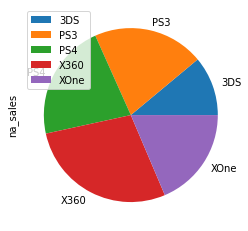

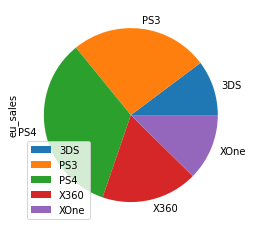

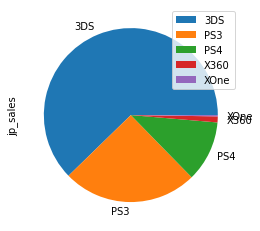

In [32]:
for reg in ['na_sales', 'eu_sales', 'jp_sales']:
    region.plot(kind='pie', x='platform', y=reg)
    plt.show()

В регионе NA наиболее популярны платформы X360,PS4, PS3. В регионе EU наиболее популярны платформы PS3 и PS4. А в регионе JP огромную долю рынка заняла 3DS, а наименее популярными платформами являются XOne и X360. Эти 3 рынка довольно сильно отличаются друг от друга в предпочтениях.

Определим для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5). Поясним разницу.

In [33]:
genre = profit_platforms.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc ='sum')
genre

,eu_sales,jp_sales,na_sales
genre,,,
Action,136.51,40.95,153.47
Adventure,7.84,4.28,8.19
Fighting,8.77,7.41,15.65
Misc,14.43,6.61,22.86
Platform,12.53,4.89,13.38
Puzzle,0.89,1.21,0.51
Racing,22.70,1.10,12.98
Role-Playing,38.04,49.49,51.81
Shooter,102.87,7.58,136.53


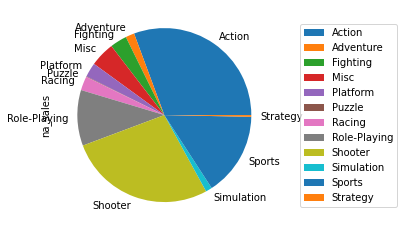

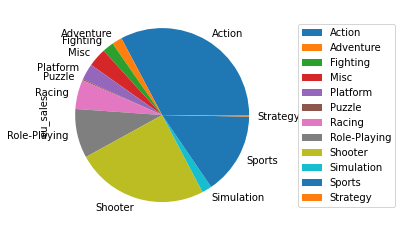

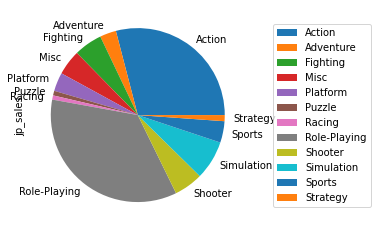

In [34]:
for reg in ['na_sales', 'eu_sales', 'jp_sales']:
    genre.plot(kind='pie', x='genre', y=reg).legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
    plt.show()

В регионах NA и EU интересы пользователей в целом совпадают - наиболее популярные игры жанров Action, Shooter, Sports. А в регионе JP отдают предпочтение Action и Role-Playing.

Посмотрим, влияет ли рейтинг ESRB на продажи в отдельном регионе.

In [35]:
rating = profit_platforms.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
rating

,eu_sales,jp_sales,na_sales
rating,,,
E,91.71,19.98,93.39
E10+,34.22,4.82,47.99
M,172.57,18.96,214.11
T,41.78,19.51,56.07
unknown,76.42,77.68,89.04


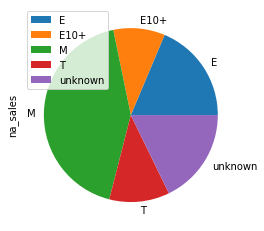

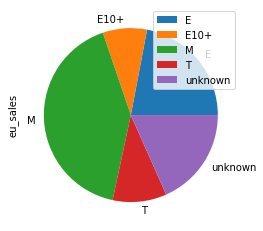

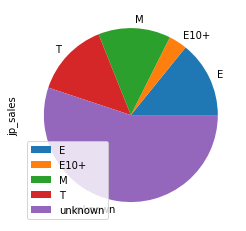

In [36]:
for rat in ['na_sales', 'eu_sales', 'jp_sales']:
    rating.plot(kind='pie', x='rating', y=rat)
    plt.show()

Судя по всему рейтинг оказывает влияние на продажи, так как продажи игр с одним и тем же рейтингом в разных странах коррелируют между собой. 

В Северной Америке наиболее популярны игры для лиц, старше 17 лет, а также игры, подходящие для всех возрастов. При этом есть немалая доля популярности игр без возрастного рейтинга, возможно тут дело в том, что какие-то игры не сразу попадают на оценку для получения рейтинга или не все разработчики игр стремятся получить маркировку по рейтингу.  
В Европе картина схожая с тем, что мы видим в Северной Америке, хотя рейтинг ESRB там не применятся. Но наверняка есть какой-то свой похожий возрастной ценз.   
В Японии картина совсем другая - там большинство игр без рейтинга. Видимо в силу того, что с рейтингом ESRB мало кто знаком. 

In [37]:
temp = data.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


unknown    1275
M           498
T           412
E           395
E10+        306
Name: rating, dtype: int64

## Проверка гипотез ##

Гипотеза 1: H0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
H1 - Средние пользовательские рейтинги платформ Xbox One и PC разные

In [38]:
XOne_rat = data.loc[data['platform'] == 'XOne', 'user_score'].dropna()
PC_rat = data.loc[data['platform'] == 'PC', 'user_score'].dropna()
alpha = .05
results = st.ttest_ind(XOne_rat, PC_rat)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Отвергнуть нулевую гипотезу не получилось')

p-значение:  0.5535080500643661
Отвергнуть нулевую гипотезу не получилось


Гипотеза 2: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные - примем эту гипотезу за Н1. А за нулевую гипотезу Н0 возьмем то, что рейтинги одинаковые.

In [39]:
Action_rat = data.loc[data['genre'] == 'Action', 'user_score'].dropna()
Sports_rat = data.loc[data['genre'] == 'Sports', 'user_score'].dropna()
alpha = .05
results = st.ttest_ind(Action_rat, Sports_rat)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Отвергнуть нулевую гипотезу не получилось')

p-значение:  3.7163089460934874e-26
Отвергаем нулевую гипотезу


Как вы сформулировали нулевую и альтернативную гипотезы - нулевые гипотезы сформулированы, исходя из равенства двух рейтингов друг другу, а альтернативные наоборот берем, исходя из того, что рейтинги друг другу не равны. 

Какой критерий применили для проверки гипотез и почему - я проводила проверку гипотез о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, так как эти выборки друг от друга не зависят. 

## Общий вывод ##

Что было сделано в проекте:
1. Изучены общие данные: что есть в сводной таблице, какой тип данных к каждом столбце, где есть пропуски и как они влияют на все данные в целом.
2. Посчитаны суммарные продажи по всем регионам и записаны в отдельный столбец, чтобы в дальнейшем проводить расчеты с этими цифрами.
3. Проведен исследовательский анализ данных:
- Узнала, что год от года количество выпускаемых игр только растет. Исходя из этого для дальнейшего анализа был выбран период за последние 5 лет - с 2012 по 2016 года, чтобы анализ получился наиболее релевантным;
- Посмотрела, как менялись продажи по платформам. Выбрала платформы с наибольшими суммарными продажами: X360, PS3, 3DS, PS4, XOne. Определила, что платформы живут от 4 до 12 лет самое большое, обычно не больше 10 лет. 
- Построила график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Получилось, что медиана продаж для всех выбранных платформ примерно одинаковая - на уровне 0,1 (DS, PSP) - 0,3 ( X360). При этом межквартильный размах у разных платформ очень разный. Для всех платформ можно отметить большое количество выбросов;
- Определила, что прямая корреляция между продажами игр на платформах и оценкой критиков есть, хотя и не очень сильная. А вот пользовательская оценка практически никак не отражается на продажах, здесь корреляция совсем незначительная. Это касается всех популярных платформ;
- Посмотрела на общее распределение игр по жанрам. Жанр Shooter действительно обладает самыми высокими медианными продажими и самым большим размахом. В то время, как в продажи жанра Action судя по всему вклад делают большое количество выбросов.

4. Составила портрет пользователя каждого региона: 
- В Северной Америке наиболее популярными являются платформы X360,PS4, PS3. Наиболее популярными жанрами игр можно назвать Action, Shooter, Sports. 
- в Европе пользователи предпочитают платформы PS3 и PS4. Как и в Северной Америке, здесь увлекаются жанрами Action, Shooter, Sports.
- в Японии предпочитают XOne и X360. Из жанров - Role-Playing	и Action.
- в Северной Америке и Европе наиболее популярны игры для лиц старше 17 лет и игры, не имеющие ограничений по возрасту, значит можно сказать, что рейтинг ESRB там работает. А вот про Японию такого сказать нельзя, так как там видимо практически не используется маркировка ESRB в играх.  

5. Проверила гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - здесь я не смогла отвергнуть нулевую гипотезу о равенстве рейтингов, поскольку получила уровень значимости чуть выше заданного. 
- Средние пользовательские рейтинги жанров Action и Sports разные - здесь не подтвердилась нулевая гипотеза о равенстве рейтингов этих двух жанров, а значит можно придерживаться альтернативной о том, что рейтинги разные. 